In [1]:
import tweepy
import textwrap
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
%matplotlib inline

In [2]:
twitter_api = pd.read_csv(r'''C:\Users\Vasu\twitter_api.csv''')

In [3]:
auth = tweepy.OAuthHandler(twitter_api.key_value[0], twitter_api.key_value[1])
auth.set_access_token(twitter_api.key_value[2], twitter_api.key_value[3])

In [4]:
api = tweepy.API(auth)

In [5]:


# We create a tweet list as follows:
tweets = api.search(q="#insurtech")
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[0:3]:
    print(tweet.text)
    print()

Number of tweets extracted: 14.

5 recent tweets:

Guidewire is #hiring for Technical Consultant - 80% Travel, North America
#insurtech #fintech #tweetmyjobs… https://t.co/KVOnlilbZX

RT @helene_wpli: Is #AI the future ? No, it’s Now !⤵️
#futureofwork #IoT #RPA #4IR #fintech #insurtech #healthtech #DigitalTransformation…

RT @FGraillot: Here are 3 big companies that might benefit from leveraging the #blockchain technology. #FinTech #InsurTech https://t.co/2VH…



In [6]:
#from datetime import datetime as dt
def get_all_tweets(api,hashtag):

    alltweets = []  
    new_tweets = []
    outtweets = []

    new_tweets = api.search(q = hashtag,count=200)

    alltweets.extend(new_tweets)

	#save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(alltweets) <10000:
        #print("getting tweets before %s" % (oldest))

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.search(q = hashtag,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        

        #print("...%s tweets downloaded so far" % (len(alltweets)))

    return alltweets

In [7]:
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweeted'] = [tweet.retweeted for tweet 
    in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['hashtags'] = [tweet.entities['hashtags'] for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet 
    in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet 
    in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet 
    in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

In [8]:
tweets = get_all_tweets(api, "#insurtech")
insurtech_tweets= toDataFrame(tweets)

In [9]:
 insurtech_tweets['tweetText'] = insurtech_tweets.tweetText.replace('machinelearning', 'machine learning')

In [10]:
insurtech_tweets = insurtech_tweets[~insurtech_tweets.duplicated(subset = ['tweetText'], keep='first')]

In [11]:
insurtech_tweets = insurtech_tweets.reset_index(drop=True)

In [12]:
insurtech_tweets.tweetText [1:5]

1    RT @helene_wpli: Is #AI the future ? No, it’s ...
2    RT @FGraillot: Here are 3 big companies that m...
3    RT @globaliqx: Insurtech Research Report: The ...
4    RT @SpirosMargaris: Don't fear the rise of #ro...
Name: tweetText, dtype: object

In [13]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

In [14]:
import gensim
from gensim import corpora, models, similarities

import warnings
warnings.simplefilter("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [15]:
corpus=[]
a=[]
for i in range(len(insurtech_tweets['tweetText'])):
        a=insurtech_tweets['tweetText'][i]
        corpus.append(a)

In [16]:
import logging
import tempfile

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "C:\Users\Vasu\AppData\Local\Temp" will be used to save temporary dictionary and corpus.


In [17]:
from nltk.corpus import stopwords
from string import punctuation

# remove common words and tokenize
list1 = ['RT','rt', '&amp;', 'spirosmargaris', '&amp', 'amp', 'fintech', 'insurtech', 'mikequindazzi', 'jurijrapoport', 'insurance', 'enricomolinari', 'jimmarous','brettking' ]
#list1 = ['RT','rt', '&amp;', '&amp', 'amp','car', 'new', 'newcar']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

In [18]:
import nltk
nltk.download('wordnet')
stop = set(stopwords.words('english'))

def process(text):
    text = text.lower()
    text_filt = re.findall(r'\b[a-zA-Z]{3,}\b', text)
    
    wordnet_lemmatizer = WordNetLemmatizer()
    text_filt_le = [wordnet_lemmatizer.lemmatize(i) for i in text_filt]
    words_filt = [w for w in text_filt_le if w not in stop]
    return words_filt


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vasu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
insurtech_tweets['tokens'] = insurtech_tweets['tweetText'].apply(process)

In [20]:
insurtech_tweets['tokens'][1:3]

1    [future, futureofwork, iot, rpa, fintech, insu...
2    [fgraillot, big, company, might, benefit, leve...
Name: tokens, dtype: object

In [21]:
from gensim.corpora import Dictionary, MmCorpus
def prep_corpus(docs, additional_stopwords=set(), no_below=3, no_above=0.5):
    print('Building dictionary...')
    dictionary = Dictionary(docs)
#     print(dictionary)
    stopword_list = stop.union(additional_stopwords)
#     print(stopwords)
    stopword_ids = map(dictionary.token2id.get, stopword_list)
#     print(stopword_ids)
    dictionary.filter_tokens(stopword_ids)
#     print(dictionary)
    dictionary.compactify()
#     print(dictionary)
    dictionary.filter_extremes(no_below=no_below, no_above=no_above, keep_n=None)
    print(dictionary)
    dictionary.compactify()
    
    print('Building corpus...')
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    
    return dictionary, corpus

In [22]:
from string import punctuation
additional_stopwords = list(punctuation) + list1
dictionary, corpus_2 = prep_corpus(insurtech_tweets['tokens'],additional_stopwords)

2018-11-11 20:11:16,254 : INFO : adding document #0 to Dictionary(0 unique tokens: [])


Building dictionary...


2018-11-11 20:11:16,687 : INFO : built Dictionary(6840 unique tokens: ['america', 'consultant', 'fintech', 'guidewire', 'hiring']...) from 3984 documents (total 42757 corpus positions)
2018-11-11 20:11:16,757 : INFO : discarding 4653 tokens: [('http', 3088), ('kvonlilbzx', 1), ('futuretech', 2), ('ttaulli', 2), ('capitalist', 1), ('caught', 1), ('existing', 1), ('strength', 1), ('mzhhvoqpvp', 1), ('broculture', 1)]...
2018-11-11 20:11:16,760 : INFO : keeping 2177 tokens which were in no less than 3 and no more than 1992 (=50.0%) documents
2018-11-11 20:11:16,775 : INFO : resulting dictionary: Dictionary(2177 unique tokens: ['america', 'consultant', 'guidewire', 'hiring', 'north']...)


Dictionary(2177 unique tokens: ['america', 'consultant', 'guidewire', 'hiring', 'north']...)
Building corpus...


In [23]:
import os
#dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'insurtech.dict'))  # store the dictionary, for future reference
#print(dictionary)

2018-11-11 20:11:17,021 : INFO : saving Dictionary object under C:\Users\Vasu\AppData\Local\Temp\insurtech.dict, separately None
2018-11-11 20:11:17,035 : INFO : saved C:\Users\Vasu\AppData\Local\Temp\insurtech.dict


In [24]:
#corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'insurtech.mm'), corpus_2)

2018-11-11 20:11:17,072 : INFO : storing corpus in Matrix Market format to C:\Users\Vasu\AppData\Local\Temp\insurtech.mm
2018-11-11 20:11:17,082 : INFO : saving sparse matrix to C:\Users\Vasu\AppData\Local\Temp\insurtech.mm
2018-11-11 20:11:17,088 : INFO : PROGRESS: saving document #0
2018-11-11 20:11:17,190 : INFO : PROGRESS: saving document #1000
2018-11-11 20:11:17,321 : INFO : PROGRESS: saving document #2000
2018-11-11 20:11:17,428 : INFO : PROGRESS: saving document #3000
2018-11-11 20:11:17,523 : INFO : saved 3984x2177 matrix, density=0.312% (27039/8673168)
2018-11-11 20:11:17,530 : INFO : saving MmCorpus index to C:\Users\Vasu\AppData\Local\Temp\insurtech.mm.index


In [25]:
from gensim import corpora, models, similarities

In [26]:
tfidf = models.TfidfModel(corpus_2) # step 1 -- initialize a model

2018-11-11 20:11:17,585 : INFO : collecting document frequencies
2018-11-11 20:11:17,597 : INFO : PROGRESS: processing document #0
2018-11-11 20:11:17,653 : INFO : calculating IDF weights for 3984 documents and 2176 features (27039 matrix non-zeros)


In [27]:
corpus_tfidf = tfidf[corpus_2]  # step 2 -- use the model to transform vectors

In [28]:
total_topics = 4

In [29]:
lda = models.LdaModel(corpus_2, id2word=dictionary, num_topics=total_topics,minimum_probability=0)
corpus_lda = lda[corpus_tfidf]

2018-11-11 20:11:17,766 : INFO : using symmetric alpha at 0.25
2018-11-11 20:11:17,771 : INFO : using symmetric eta at 0.25
2018-11-11 20:11:17,776 : INFO : using serial LDA version on this node
2018-11-11 20:11:17,788 : INFO : running online (single-pass) LDA training, 4 topics, 1 passes over the supplied corpus of 3984 documents, updating model once every 2000 documents, evaluating perplexity every 3984 documents, iterating 50x with a convergence threshold of 0.001000
2018-11-11 20:11:17,795 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-11-11 20:11:17,803 : INFO : PROGRESS: pass 0, at document #2000/3984
2018-11-11 20:11:23,228 : INFO : merging changes from 2000 documents into a model of 3984 documents
2018-11-11 20:11:23,238 : INFO : topic #0 (0.250): 0.031*"use" + 0.027*"case" + 0.025*"guide" + 0.024*"machine" + 0.024*"learning" + 0.024*"concise" + 0.019*"via" + 0.019*"machinelearning" + 0.0

In [30]:
lda.show_topics(total_topics,8)

[(0,
  '0.035*"use" + 0.035*"case" + 0.033*"guide" + 0.031*"learning" + 0.031*"machine" + 0.029*"concise" + 0.018*"via" + 0.014*"machinelearning"'),
 (1,
  '0.025*"blockchain" + 0.014*"cybersecurity" + 0.014*"technology" + 0.013*"infographic" + 0.011*"iot" + 0.009*"innovation" + 0.009*"new" + 0.009*"tech"'),
 (2,
  '0.023*"iot" + 0.023*"blockchain" + 0.019*"bigdata" + 0.017*"via" + 0.016*"startup" + 0.011*"data" + 0.009*"machinelearning" + 0.009*"future"'),
 (3,
  '0.012*"using" + 0.012*"help" + 0.009*"life" + 0.008*"payment" + 0.007*"learning" + 0.007*"save" + 0.007*"deep" + 0.006*"explainable"')]

In [31]:
from collections import OrderedDict
    
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [32]:
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(72, 4)
(4, 72)


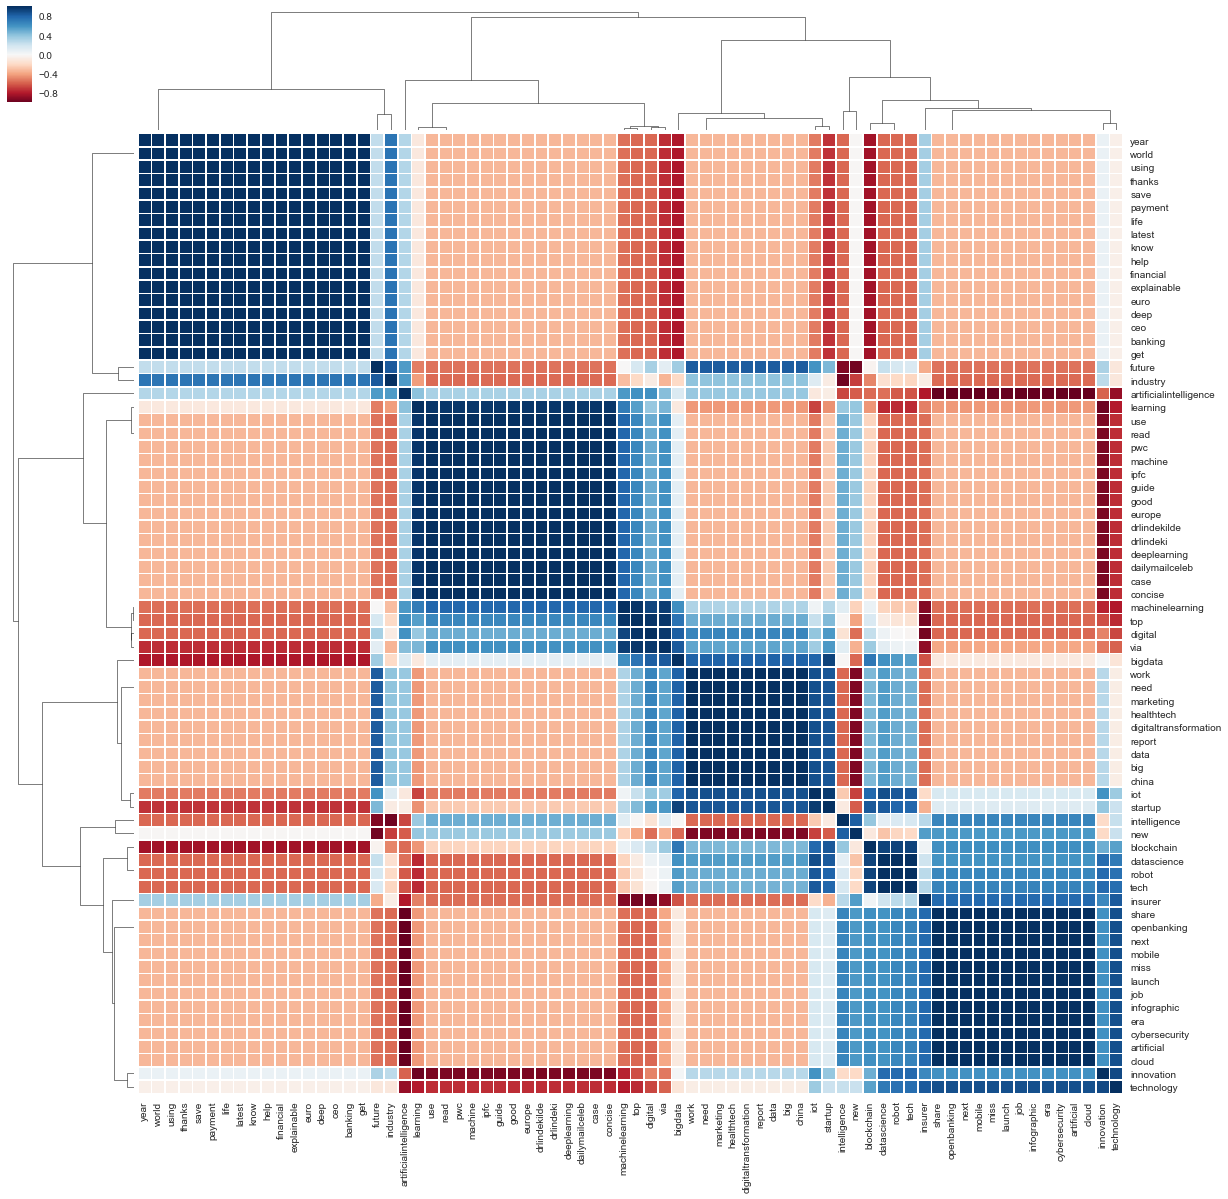

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(20, 20))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [36]:
   ## Interactive visualisation
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
pyLDAvis.display(vis)